# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## Reading the dataset and removing the invalid rows

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [4]:
total_rows=len(star_wars.index)
print(total_rows)

1187


In [5]:
star_wars=star_wars[pd.notnull(star_wars["RespondentID"])]
total_rows=len(star_wars.index)
print(total_rows)

1186


Now every row has a valid RespondentID.

## Cleaning and Mapping Yes/No Columns

Looking at the next two columns, which are:

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

I've seen both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question.

Both columns are currently string types, because the main values they contain are Yes and No. I can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN.

In [6]:
yes_no = {
    "Yes": True,
    "No": False
}
seen_films="Have you seen any of the 6 films in the Star Wars franchise?"
fan="Do you consider yourself to be a fan of the Star Wars film franchise?"

In [7]:
star_wars[seen_films] = star_wars[seen_films].map(yes_no)
star_wars[fan] = star_wars[fan].map(yes_no)

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, "Which of the following Star Wars films have you seen? Please select all that apply."

The columns for this question are:

- "Which of the following Star Wars films have you seen? Please select all that apply." - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- "Unnamed: 4" - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- "Unnamed: 5" - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- "Unnamed: 6" - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- "Unnamed: 7" - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- "Unnamed: 8" - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. I'll assume that they didn't see the movie.

I need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [8]:
print(star_wars[seen_films].value_counts(dropna=False))
print(star_wars[fan].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [9]:
print(star_wars.columns[3:9])
print(star_wars.iloc[:,3:9].head(3))

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star

In [10]:
import numpy as np
bool_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

In [11]:
which_film="Which of the following Star Wars films have you seen? Please select all that apply."
star_wars[which_film] = star_wars[which_film].map(bool_map)
star_wars["Unnamed: 4"] = star_wars["Unnamed: 4"].map(bool_map)
star_wars["Unnamed: 5"] = star_wars["Unnamed: 5"].map(bool_map)
star_wars["Unnamed: 6"] = star_wars["Unnamed: 6"].map(bool_map)
star_wars["Unnamed: 7"] = star_wars["Unnamed: 7"].map(bool_map)
star_wars["Unnamed: 8"] = star_wars["Unnamed: 8"].map(bool_map)

In [12]:
columns_ren={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4":"seen_2",
    "Unnamed: 5":"seen_3",
    "Unnamed: 6":"seen_4",
    "Unnamed: 7":"seen_5",
    "Unnamed: 8":"seen_6",
}
star_wars = star_wars.rename(columns=columns_ren)
print(star_wars.iloc[:,3:9].head(3))

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
1    True    True    True    True    True    True
2   False   False   False   False   False   False
3    True    True    True   False   False   False


## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

I need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
columns_ren_2={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10":"ranking_2",
    "Unnamed: 11":"ranking_3",
    "Unnamed: 12":"ranking_4",
    "Unnamed: 13":"ranking_5",
    "Unnamed: 14":"ranking_6",
}
star_wars = star_wars.rename(columns=columns_ren_2)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

## Finding the Highest-Ranked Movie

Now that I've cleaned up the ranking columns, I can find the highest-ranked movie more quickly. To do this, I take the mean of each of the ranking columns.

In [14]:
mean_rank=star_wars.iloc[:,9:15].mean(axis=0)
print(mean_rank)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


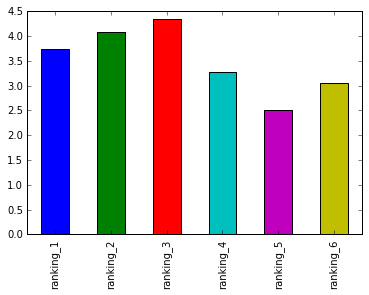

In [15]:
%matplotlib inline
mean_rank.plot.bar()

So far I've cleaned the columns 3:15 and I discovered that the favourite film according to the fans is "The empire strikes back".
In fact it's an almost universal opinion that the original trilogy is better than the prequels.

## Finding the Most Viewed Movie

I can figure out how many people have seen each movie just by taking the sum of the right column.

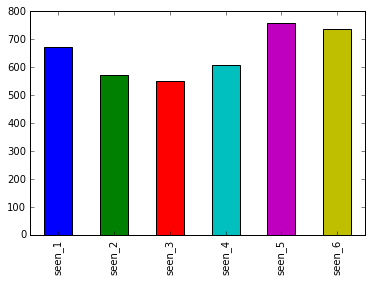

In [16]:
how_much_seen=star_wars.iloc[:,3:9].sum(axis=0)
how_much_seen.plot.bar()

This result could be explained in this way:
"A new hope" was a new film and not everyone have seen it, but then the franchise became popular and the two sequels have reached more popularity.
"Phantom menace" was hyped by the franchise popularity but disappointed the fans, consequently the two sequels were less watched.

## Exploring the Data by Bynary Segments

I know which movies the survey population as a whole has ranked the highest. Now I'll examine how certain segments of the survey population responded. There are several columns that segment our data into two groups:

- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

I can split a dataframe into two groups based on a binary column by creating two subsets of that column.

In [17]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

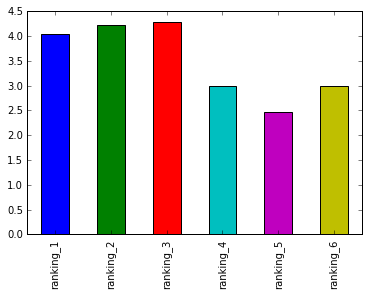

In [18]:
mean_rank_males=males.iloc[:,9:15].mean(axis=0)
mean_rank_males.plot.bar()

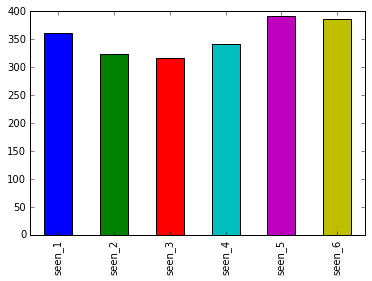

In [19]:
how_much_seen_males=males.iloc[:,3:9].sum(axis=0)
how_much_seen_males.plot.bar()

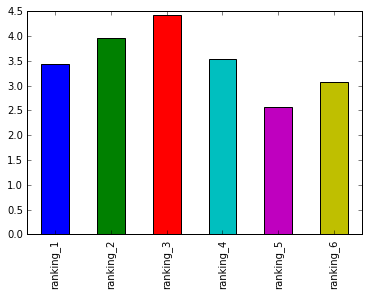

In [20]:
mean_rank_females=females.iloc[:,9:15].mean(axis=0)
mean_rank_females.plot.bar()

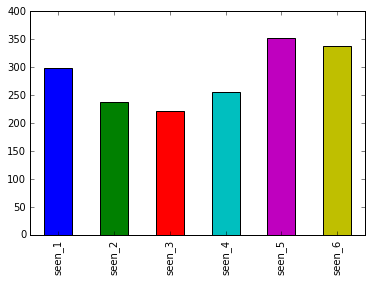

In [21]:
how_much_seen_females=females.iloc[:,3:9].sum(axis=0)
how_much_seen_females.plot.bar()

The two genders agree each other.

## Segment the data based on Education, Location and "Which character shot first?"

Now I try to investigate the ranking trends based on these different parameters.

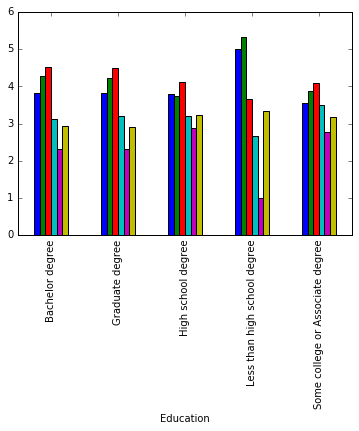

In [22]:
grouped = star_wars.groupby('Education')
star_wars_ed=grouped.agg(np.mean)
star_wars_ed.iloc[:,8:14].plot.bar(legend=False)

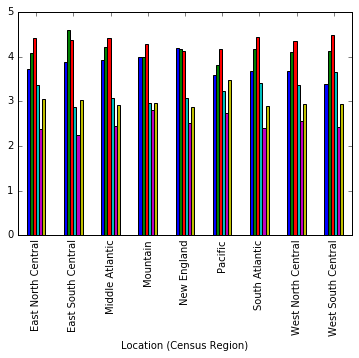

In [23]:
grouped = star_wars.groupby('Location (Census Region)')
star_wars_loc=grouped.agg(np.mean)
star_wars_loc.iloc[:,8:14].plot.bar(legend=False)

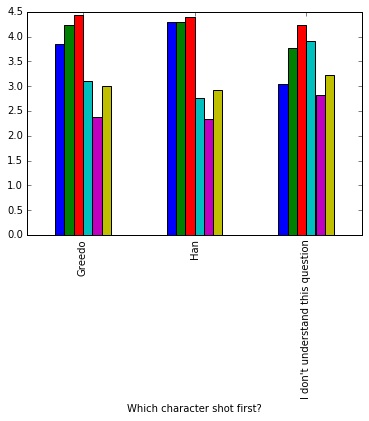

In [24]:
grouped = star_wars.groupby('Which character shot first?')
star_wars_sh=grouped.agg(np.mean)
star_wars_sh.iloc[:,8:14].plot.bar(legend=False)

## Which character is viewed more favorably? Which more unfavorably?

In [25]:
print(star_wars.iloc[:,15:29].head(4))

  Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
1                                     Very favorably                                                               
2                                                NaN                                                               
3                                 Somewhat favorably                                                               
4                                     Very favorably                                                               

          Unnamed: 16         Unnamed: 17         Unnamed: 18  \
1      Very favorably      Very favorably      Very favorably   
2                 NaN                 NaN                 NaN   
3  Somewhat favorably  Somewhat favorably  Somewhat favorably   
4      Very favorably      Very favorably      Very favorably   

          Unnamed: 19         Unnamed: 20       Unnamed: 21  \
1      Very favorably      Ver

In [26]:
columns_ren_3={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han",
    "Unnamed: 16":"Luke",
    "Unnamed: 17":"Leia",
    "Unnamed: 18":"Anakin",
    "Unnamed: 19":"Obi Wan",
    "Unnamed: 20":"Palpatine",
    "Unnamed: 21":"Darth Vader",
    "Unnamed: 22":"Lando",
    "Unnamed: 23":"Boba Fett",
    "Unnamed: 24":"C-3P0",
    "Unnamed: 25":"R2 D2",
    "Unnamed: 26":"Jar Jar",
    "Unnamed: 27":"Padme",
    "Unnamed: 28":"Yoda",
}
star_wars = star_wars.rename(columns=columns_ren_3)

In [27]:
print(star_wars["Darth Vader"].value_counts())

Very favorably                                 310
Somewhat favorably                             171
Very unfavorably                               149
Somewhat unfavorably                           102
Neither favorably nor unfavorably (neutral)     84
Unfamiliar (N/A)                                10
Name: Darth Vader, dtype: int64


In [28]:
def favorable(el):
    if el=="Very favorably":
        return 4
    elif el=="Somewhat favorably":
        return 3
    elif el=="Neither favorably nor unfavorably (neutral)":
        return 2
    elif el=="Somewhat unfavorably":
        return 1
    elif el=="Very unfavorably":
        return 0
    else:
        return np.nan
star_wars.iloc[:,15:29]=star_wars.iloc[:,15:29].applymap(favorable)

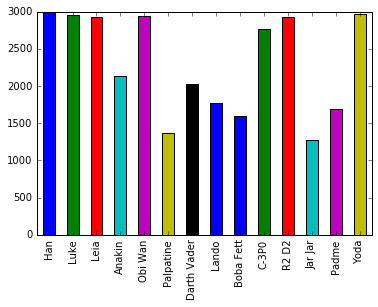

In [29]:
fav_sum=star_wars.iloc[:,15:29].sum(axis=0)
fav_sum.plot.bar()

Some notable facts:

- Han is more loved even than Luke.
- Padme is considered more negatively than Darth Vader.
- Jar Jar Binks is more hated even than the emperor himself and win the Hatred Cup!